In [110]:
import rasterio
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.mask import mask
from shapely.geometry import mapping
from scipy.stats import pearsonr
import glob
import seaborn as sns

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 46, 'height': 65, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.05000000074505806, 0.0, -12.849997509270906,
       0.0, -0.05000000074505806, 18.349999528378248), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}


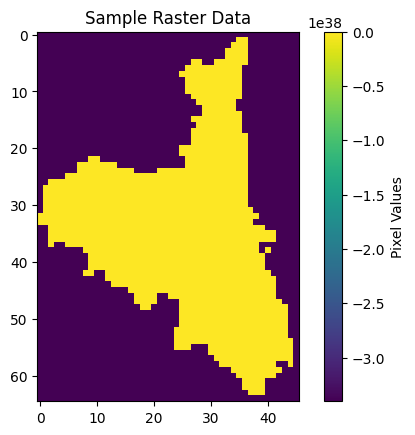

In [111]:
raster_path = "Datasets_Hackathon/Climate_Precipitation_Data/2010R.tif"

with rasterio.open(raster_path) as dataset:
    band1 = dataset.read(1) 

    print(dataset.profile)

    plt.imshow(band1, cmap="viridis")
    plt.colorbar(label="Pixel Values")
    plt.title("Sample Raster Data")
    plt.show()

In [112]:
raster_path = "Datasets_Hackathon/Climate_Precipitation_Data/2010R.tif"

with rasterio.open(raster_path) as dataset:
    print("Metadata:", dataset.meta)
    print("Data Type:", dataset.dtypes)
    print("Min-Max Pixel Values:", dataset.read(1).min(), dataset.read(1).max())


Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 46, 'height': 65, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.05000000074505806, 0.0, -12.849997509270906,
       0.0, -0.05000000074505806, 18.349999528378248)}
Data Type: ('float32',)
Min-Max Pixel Values: -3.4028235e+38 500.84424


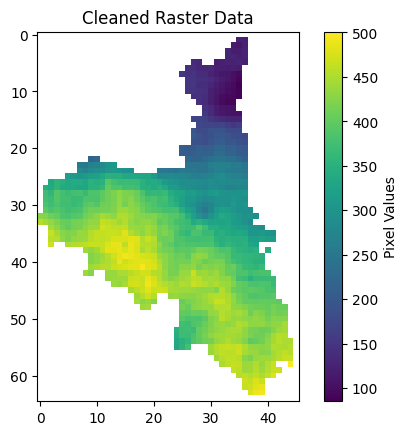

In [113]:
raster_path = "Datasets_Hackathon/Climate_Precipitation_Data/2010R.tif"

with rasterio.open(raster_path) as dataset:
    band1 = dataset.read(1)

    nodata_value = dataset.nodata
    band1 = np.where(band1 == nodata_value, np.nan, band1)  

    plt.imshow(band1, cmap="viridis")
    plt.colorbar(label="Pixel Values")
    plt.title("Cleaned Raster Data")
    plt.show()

## Extracting data from climate precipitation .tif files

In [114]:
folder_path = "Datasets_Hackathon/Climate_Precipitation_Data"
tif_files = sorted(glob.glob(f"{folder_path}/*.tif")) 

precip_data = []

for raster_path in tif_files:
    year = int(raster_path.split("/")[-1][:4]) 

    with rasterio.open(raster_path) as dataset:
        band1 = dataset.read(1)
        band1 = np.where(band1 == dataset.nodata, np.nan, band1) 
        avg_precip = np.nanmean(band1) 

    precip_data.append({"Year": year, "Mean_Precipitation": avg_precip})

df_precip = pd.DataFrame(precip_data)
df_precip.to_csv("precipitation_trends.csv", index=False)
print("Saved precipitation trends!")

Saved precipitation trends!


In [115]:
df_precip

,Year,Mean_Precipitation
0,2010,358.480469
1,2011,200.431107
2,2012,351.676025
3,2013,261.263092
4,2014,236.406708
5,2015,245.469055
6,2016,295.838470
7,2017,226.643814
8,2018,256.811310
9,2019,187.799301


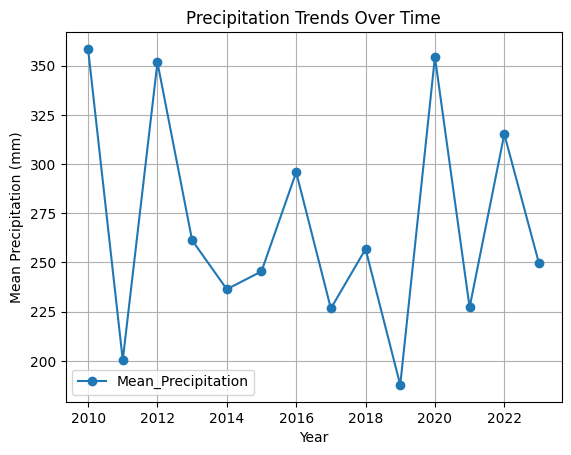

In [116]:
import matplotlib.pyplot as plt

df_precip.plot(x="Year", y="Mean_Precipitation", kind="line", marker="o", title="Precipitation Trends Over Time")
plt.ylabel("Mean Precipitation (mm)")
plt.xlabel("Year")
plt.grid()
plt.show()

## Extracting info from the .tfw

In [117]:
import os

folder_path = "Datasets_Hackathon/Climate_Precipitation_Data"
tfw_files = sorted(glob.glob(f"{folder_path}/*.tfw"))  

for raster_path in tfw_files:
    year = int(raster_path.split("/")[-1][:4])  
    with open(raster_path, "r") as f:
        lines = f.readlines()
        print(f"Georeferencing for {year}: {lines}")

Georeferencing for 2010: ['0.0500000007\n', '0.0000000000\n', '0.0000000000\n', '-0.0500000007\n', '-12.8249975089\n', '18.3249995280\n']
Georeferencing for 2011: ['0.0500000007\n', '0.0000000000\n', '0.0000000000\n', '-0.0500000007\n', '-12.8249975089\n', '18.3249995280\n']
Georeferencing for 2012: ['0.0500000007\n', '0.0000000000\n', '0.0000000000\n', '-0.0500000007\n', '-12.8249975089\n', '18.3249995280\n']
Georeferencing for 2013: ['0.0500000007\n', '0.0000000000\n', '0.0000000000\n', '-0.0500000007\n', '-12.8249975089\n', '18.3249995280\n']
Georeferencing for 2014: ['0.0500000007\n', '0.0000000000\n', '0.0000000000\n', '-0.0500000007\n', '-12.8249975089\n', '18.3249995280\n']
Georeferencing for 2015: ['0.0500000007\n', '0.0000000000\n', '0.0000000000\n', '-0.0500000007\n', '-12.8249975089\n', '18.3249995280\n']
Georeferencing for 2016: ['0.0500000007\n', '0.0000000000\n', '0.0000000000\n', '-0.0500000007\n', '-12.8249975089\n', '18.3249995280\n']
Georeferencing for 2017: ['0.05000

In [118]:
folder_path = "Datasets_Hackathon/Climate_Precipitation_Data"
tfw_files = sorted(glob.glob(f"{folder_path}/*.tfw"))  
geo_data = []

for raster_path in tfw_files:
    year = int(raster_path.split("/")[-1][:4])  
    with open(raster_path, "r") as f:
        lines = [float(line.strip()) for line in f.readlines()]
    
    geo_data.append({
        "Year": year,
        "Pixel_Size_X": lines[0],
        "Pixel_Size_Y": lines[3],
        "Top_Left_X": lines[4],
        "Top_Left_Y": lines[5]
    })

df_geo = pd.DataFrame(geo_data)
df_geo.to_csv("georeferencing_data.csv", index=False)
print("Saved georeferencing data!")

Saved georeferencing data!


In [119]:
df_geo

,Year,Pixel_Size_X,Pixel_Size_Y,Top_Left_X,Top_Left_Y
0,2010,0.05,-0.05,-12.824998,18.325
1,2011,0.05,-0.05,-12.824998,18.325
2,2012,0.05,-0.05,-12.824998,18.325
3,2013,0.05,-0.05,-12.824998,18.325
4,2014,0.05,-0.05,-12.824998,18.325
5,2015,0.05,-0.05,-12.824998,18.325
6,2016,0.05,-0.05,-12.824998,18.325
7,2017,0.05,-0.05,-12.824998,18.325
8,2018,0.05,-0.05,-12.824998,18.325
9,2019,0.05,-0.05,-12.824998,18.325


In [120]:
df_precip = pd.read_csv("precipitation_trends.csv")
df_geo = pd.read_csv("georeferencing_data.csv")

df_merged = df_precip.merge(df_geo, on="Year")

df_merged.to_csv("merged_precipitation_georeferencing.csv", index=False)
print("Saved merged dataset!")

Saved merged dataset!


In [121]:
df_merged

,Year,Mean_Precipitation,Pixel_Size_X,Pixel_Size_Y,Top_Left_X,Top_Left_Y
0,2010,358.48047,0.05,-0.05,-12.824998,18.325
1,2011,200.43110,0.05,-0.05,-12.824998,18.325
2,2012,351.67603,0.05,-0.05,-12.824998,18.325
3,2013,261.26310,0.05,-0.05,-12.824998,18.325
4,2014,236.40671,0.05,-0.05,-12.824998,18.325
5,2015,245.46906,0.05,-0.05,-12.824998,18.325
6,2016,295.83847,0.05,-0.05,-12.824998,18.325
7,2017,226.64381,0.05,-0.05,-12.824998,18.325
8,2018,256.81130,0.05,-0.05,-12.824998,18.325
9,2019,187.79930,0.05,-0.05,-12.824998,18.325


# Admin

In [122]:
shaperaster_path = "Datasets_Hackathon/Admin_layers/Assaba_Region_layer.shp"
gdf_Region = gpd.read_file(shaperaster_path)

print(gdf_Region.head())

print(gdf_Region.columns)

   FID_1    ADM2_EN ADM2_PCODE ADM2_REF ADM1_EN ADM1_PCODE     ADM0_EN  \
0      6   Boumdeid      MR032     None  Assaba       MR03  Mauritania   
1      7  Kankoussa      MR034     None  Assaba       MR03  Mauritania   
2      8    Barkéol      MR031  Barkeol  Assaba       MR03  Mauritania   
3      4     Guerou      MR033     None  Assaba       MR03  Mauritania   
4      5      Kiffa      MR035     None  Assaba       MR03  Mauritania   

  ADM0_PCODE       date    validOn     validTo  Shape_Leng  Shape_Area  \
0         MR 2024-03-06 2024-03-27  0000/00/00    3.975597    0.368397   
1         MR 2024-03-06 2024-03-27  0000/00/00    4.373495    0.874687   
2         MR 2024-03-06 2024-03-27  0000/00/00    4.190714    0.546288   
3         MR 2024-03-06 2024-03-27  0000/00/00    2.499498    0.237509   
4         MR 2024-03-06 2024-03-27  0000/00/00    6.705719    1.020179   

      AREA_SQKM                                           geometry  
0   4323.851319  POLYGON ((-11.04988 17.4

In [123]:
shaperaster_path = "Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp"
gdf_District = gpd.read_file(shaperaster_path)

print(gdf_District.head())

print(gdf_District.columns)

   FID_1    ADM3_EN ADM3_PCODE ADM3_REF    ADM2_EN ADM2_PCODE ADM1_EN  \
0     71  El Ghabra    MR03106     None    Barkéol      MR031  Assaba   
1     77     Guerou    MR03301     None     Guerou      MR033  Assaba   
2     66  Barkeiwel    MR03101     None    Barkéol      MR031  Assaba   
3     91    Legrane    MR03506     None      Kiffa      MR035  Assaba   
4     82       Sani    MR03402     None  Kankoussa      MR034  Assaba   

  ADM1_PCODE     ADM0_EN ADM0_PCODE       date    validOn     validTo  \
0       MR03  Mauritania         MR 2024-03-06 2024-03-27  0000/00/00   
1       MR03  Mauritania         MR 2024-03-06 2024-03-27  0000/00/00   
2       MR03  Mauritania         MR 2024-03-06 2024-03-27  0000/00/00   
3       MR03  Mauritania         MR 2024-03-06 2024-03-27  0000/00/00   
4       MR03  Mauritania         MR 2024-03-06 2024-03-27  0000/00/00   

   Shape_Leng  Shape_Area    AREA_SQKM  \
0    1.064756    0.047306   558.684431   
1    0.466595    0.009926   117.075519

In [124]:
df_districts = gdf_District.copy()

# Save the full dataset to a CSV file
df_districts.to_csv("districts_full_data.csv", index=False)

# Display the first few rows
df_districts

,FID_1,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
0,71,El Ghabra,MR03106,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.064756,0.047306,558.684431,"POLYGON ((-12.43278 16.60025, -12.63382 16.484..."
1,77,Guerou,MR03301,None,Guerou,MR033,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,0.466595,0.009926,117.075519,"POLYGON ((-11.73593 16.81811, -11.87343 16.777..."
2,66,Barkeiwel,MR03101,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,0.539027,0.013975,164.969406,"POLYGON ((-12.47354 16.62812, -12.53268 16.668..."
3,91,Legrane,MR03506,None,Kiffa,MR035,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.794763,0.269195,3183.059156,"POLYGON ((-11.63276 16.28856, -11.66745 16.002..."
4,82,Sani,MR03402,None,Kankoussa,MR034,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.498810,0.131890,1560.970072,"POLYGON ((-11.18513 16.28856, -11.18472 16.141..."
5,70,Daghveg,MR03105,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.144794,0.052128,615.973072,"POLYGON ((-12.47354 16.45171, -12.63382 16.484..."
6,73,Bou Lahrath,MR03108,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,1.576497,0.115752,1364.926800,"POLYGON ((-12.51007 16.68146, -12.53268 16.668..."
7,85,Hamed,MR03405,None,Kankoussa,MR034,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.321192,0.199741,2369.935558,"POLYGON ((-11.11395 15.50276, -11.11652 15.499..."
8,67,Gueller,MR03102,None,Barkéol,MR031,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.242961,0.094691,1117.064669,"POLYGON ((-12.09018 16.73403, -12.08982 16.733..."
9,89,El Melgue,MR03504,None,Kiffa,MR035,Assaba,MR03,Mauritania,MR,2024-03-06,2024-03-27,0000/00/00,2.258042,0.184686,2180.571391,"POLYGON ((-11.32597 16.30651, -11.34107 16.306..."


# Precipitation by zone

In [125]:
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import pandas as pd
import glob

In [126]:
shaperaster_path = "Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp"
tif_files = sorted(glob.glob("Datasets_Hackathon/Climate_Precipitation_Data/*.tif"))  # Load all TIF files

gdf_districts = gpd.read_file(shaperaster_path)

precip_data = []

for raster_path in tif_files:
    year = int(raster_path.split("/")[-1][:4])  

    stats = zonal_stats(shaperaster_path, raster_path, stats=["mean"], nodata=-9999)

    for i, s in enumerate(stats):
        precip_data.append({
            "Year": year,
            "District": gdf_districts.iloc[i]["ADM3_EN"], 
            "Mean_Precipitation": s["mean"]
        })

df_precip_by_year = pd.DataFrame(precip_data)

df_precip_by_year.to_csv("precipitation_by_district_year.csv", index=False)
df_precip_by_year
print(df_precip_by_year.to_string())

     Year     District  Mean_Precipitation
0    2010    El Ghabra          433.276123
1    2010       Guerou          382.972388
2    2010    Barkeiwel          425.155304
3    2010      Legrane          441.898103
4    2010         Sani          435.842999
5    2010      Daghveg          450.473056
6    2010  Bou Lahrath          368.693793
7    2010        Hamed          422.334111
8    2010      Gueller          402.416424
9    2010    El Melgue          335.741924
10   2010    El Ghaira          297.400903
11   2010      Lebheir          474.018311
12   2010  Oudeiy Jrid          422.159790
13   2010       Tenaha          444.026768
14   2010       Lavtah          132.053284
15   2010        Kiffa          348.293826
16   2010      Blajmil          410.109721
17   2010   R’Dheidhie          355.583812
18   2010       Kamour          354.026228
19   2010     Boumdeid          188.429810
20   2010   Kouroudjel          407.954241
21   2010    Nouamlein          269.455740
22   2010  

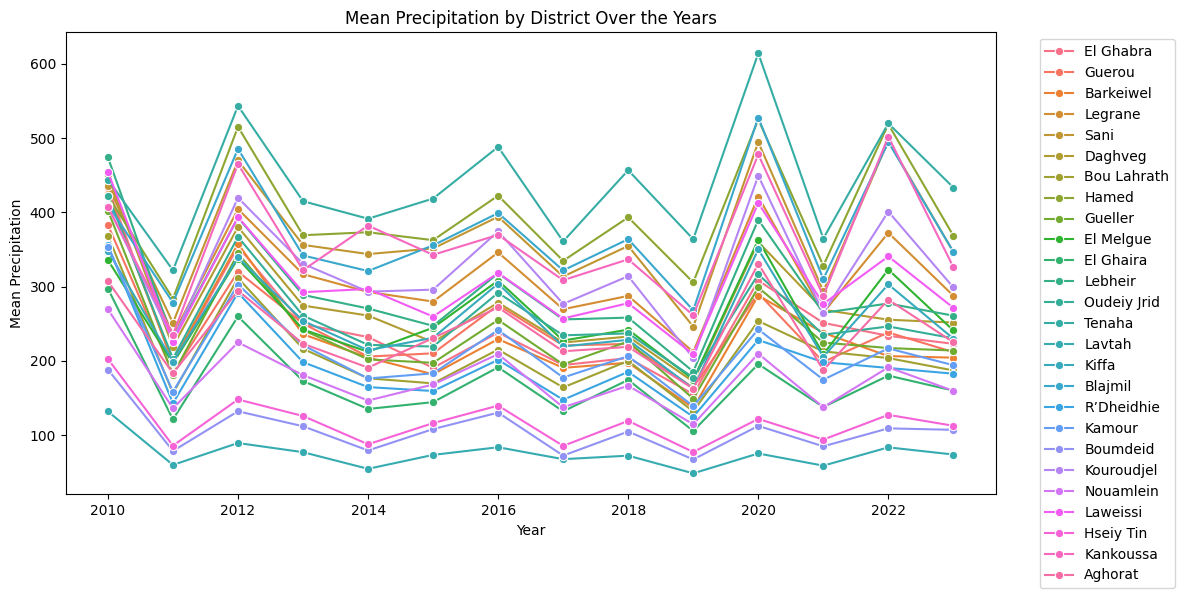

In [127]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_precip_by_year, x="Year", y="Mean_Precipitation", hue="District", marker="o")
plt.title("Mean Precipitation by District Over the Years")
plt.xlabel("Year")
plt.ylabel("Mean Precipitation")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

## Population

In [128]:
shaperaster_path = "Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp"
pop_raster_files = sorted(glob.glob("Datasets_Hackathon/Gridded_Population_Density_Data/Assaba_Pop_*.tif"))

gdf_districts = gpd.read_file(shaperaster_path)

population_data = []
for pop_raster_path in pop_raster_files:
    year = int(pop_raster_path.split("_")[-1].split(".")[0])  # Extract year from filename
    stats = zonal_stats(shaperaster_path, pop_raster_path, stats=["mean"], nodata=-9999)
    gdf_districts["Mean_Population_Density"] = [s["mean"] for s in stats]
    
    for _, row in gdf_districts.iterrows():
        population_data.append({
            "Year": year,
            "District": row["ADM3_EN"],
            "Mean_Population_Density": row["Mean_Population_Density"]
        })

df_population = pd.DataFrame(population_data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overf

In [129]:
print(df_population.to_string())

    Year     District  Mean_Population_Density
0   2010    El Ghabra                25.989079
1   2010       Guerou               139.183946
2   2010    Barkeiwel                48.570003
3   2010      Legrane                 3.990735
4   2010         Sani                 6.400814
5   2010      Daghveg                15.053498
6   2010  Bou Lahrath                 6.978767
7   2010        Hamed                     -inf
8   2010      Gueller                 4.968314
9   2010    El Melgue                 4.633765
10  2010    El Ghaira                44.840596
11  2010      Lebheir                14.146317
12  2010  Oudeiy Jrid                 6.902668
13  2010       Tenaha                     -inf
14  2010       Lavtah                 1.246981
15  2010        Kiffa                44.407182
16  2010      Blajmil                 5.054763
17  2010   R’Dheidhie                 8.108587
18  2010       Kamour                 8.121328
19  2010     Boumdeid                10.474690
20  2010   Ko

In [130]:
df_merged = pd.merge(df_precip_by_year, df_population, on=["Year", "District"], how="outer")

# Display the first few rows
print(df_merged.head())

# Save the merged dataset as a CSV file
df_merged.to_csv("merged_precip_population.csv", index=False)

   Year     District  Mean_Precipitation  Mean_Population_Density
0  2010      Aghorat          307.303885                11.537289
1  2010    Barkeiwel          425.155304                48.570003
2  2010      Blajmil          410.109721                 5.054763
3  2010  Bou Lahrath          368.693793                 6.978767
4  2010     Boumdeid          188.429810                10.474690


## GPP

In [ ]:
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import glob
from rasterstats import zonal_stats

shapefile_path = "Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp"
gpp_raster_files = sorted(glob.glob("Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/*.tif"))

gdf_districts = gpd.read_file(shapefile_path)

with rasterio.open(gpp_raster_files[0]) as src:
    raster_crs = src.crs

if gdf_districts.crs != raster_crs:
    gdf_districts = gdf_districts.to_crs(raster_crs)

gpp_data = []

for gpp_file in gpp_raster_files:
    year = int(gpp_file.split("/")[-1].split("_")[0])  

    stats = zonal_stats(gdf_districts, gpp_file, stats="mean", nodata=np.nan)

    for i, s in enumerate(stats):
        gpp_data.append({
            "Year": year,
            "District": gdf_districts.iloc[i]["ADM3_EN"],  
            "Mean_GPP": s["mean"] if s["mean"] is not None else np.nan
        })

df_gpp = pd.DataFrame(gpp_data)

df_gpp.to_csv("gpp_by_district_year.csv", index=False)

print(df_gpp.head())

   Year   District      Mean_GPP
0  2010  El Ghabra  36291.007660
1  2010     Guerou  17160.209091
2  2010  Barkeiwel  49176.875163
3  2010    Legrane   2048.848485
4  2010       Sani   1455.798987


In [132]:
print(df_gpp.to_string())

     Year     District      Mean_GPP
0    2010    El Ghabra  36291.007660
1    2010       Guerou  17160.209091
2    2010    Barkeiwel  49176.875163
3    2010      Legrane   2048.848485
4    2010         Sani   1455.798987
5    2010      Daghveg  50727.950295
6    2010  Bou Lahrath  60746.860833
7    2010        Hamed   2203.291960
8    2010      Gueller  53527.712896
9    2010    El Melgue   2723.476364
10   2010    El Ghaira  58927.978930
11   2010      Lebheir  40773.586417
12   2010  Oudeiy Jrid  31845.167249
13   2010       Tenaha   2554.694915
14   2010       Lavtah  65455.855582
15   2010        Kiffa   7990.466425
16   2010      Blajmil   1732.634299
17   2010   R’Dheidhie  53411.867027
18   2010       Kamour  35177.802308
19   2010     Boumdeid  63972.206304
20   2010   Kouroudjel   1308.322642
21   2010    Nouamlein  37020.305763
22   2010     Laweissi  37244.170344
23   2010    Hseiy Tin  65432.108290
24   2010    Kankoussa   1742.561991
25   2010      Aghorat   7019.086727
2

## Land Cover

In [159]:
print(gdf_districts.columns)

Index(['FID_1', 'ADM3_EN', 'ADM3_PCODE', 'ADM3_REF', 'ADM2_EN', 'ADM2_PCODE',
       'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn',
       'validTo', 'Shape_Leng', 'Shape_Area', 'AREA_SQKM', 'geometry'],
      dtype='object')


In [ ]:
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import glob
from rasterstats import zonal_stats

shapefile_path = "Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp"
land_cover_files = sorted(glob.glob("Datasets_Hackathon/Modis_Land_Cover_Data/*.tif"))

gdf_districts = gpd.read_file(shapefile_path)

with rasterio.open(land_cover_files[0]) as src:
    raster_crs = src.crs

if gdf_districts.crs != raster_crs:
    gdf_districts = gdf_districts.to_crs(raster_crs)

land_cover_data = []

for land_cover_file in land_cover_files:
    year = int(land_cover_file.split("/")[-1].split("LCT")[0])

    stats = zonal_stats(gdf_districts, land_cover_file, stats="majority", nodata=np.nan)

    for i, s in enumerate(stats):
        land_cover_data.append({
            "Year": year,
            "District": gdf_districts.iloc[i]["ADM3_EN"],  # Adjust column name if needed
            "Major_Land_Cover": s["majority"] if s["majority"] is not None else np.nan
        })

df_land_cover = pd.DataFrame(land_cover_data)

df_land_cover.to_csv("land_cover_by_district_year.csv", index=False)

In [ ]:
land_cover_mapping = {
    0: "Water",
    1: "Evergreen Needleleaf Forest",
    2: "Evergreen Broadleaf Forest",
    3: "Deciduous Needleleaf Forest",
    4: "Deciduous Broadleaf Forest",
    5: "Mixed Forests",
    6: "Closed Shrublands",
    7: "Open Shrublands",
    8: "Woody Savannas",
    9: "Savannas",
    10: "Grasslands",
    11: "Permanent Wetlands",
    12: "Croplands",
    13: "Urban and Built-up Lands",
    14: "Cropland/Natural Vegetation Mosaics",
    15: "Snow and Ice",
    16: "Barren or Sparsely Vegetated"
}

df_land_cover["Major_Land_Cover"] = df_land_cover["Major_Land_Cover"].map(land_cover_mapping)

In [162]:
print(df_land_cover.to_string())

     Year     District              Major_Land_Cover
0    2010    El Ghabra                    Grasslands
1    2010       Guerou                    Grasslands
2    2010    Barkeiwel  Barren or Sparsely Vegetated
3    2010      Legrane                    Grasslands
4    2010         Sani                    Grasslands
5    2010      Daghveg  Barren or Sparsely Vegetated
6    2010  Bou Lahrath  Barren or Sparsely Vegetated
7    2010        Hamed                    Grasslands
8    2010      Gueller  Barren or Sparsely Vegetated
9    2010    El Melgue                    Grasslands
10   2010    El Ghaira  Barren or Sparsely Vegetated
11   2010      Lebheir                    Grasslands
12   2010  Oudeiy Jrid                    Grasslands
13   2010       Tenaha                    Grasslands
14   2010       Lavtah  Barren or Sparsely Vegetated
15   2010        Kiffa                    Grasslands
16   2010      Blajmil                    Grasslands
17   2010   R’Dheidhie                    Gras

# PREDICTION

In [ ]:
df = df_gpp.merge(df_land_cover, on=["Year", "District"], how="inner")
df = df.merge(df_precip_by_year, on=["Year", "District"], how="inner")
df = df.merge(df_population, on=["Year", "District"], how="inner")

df.to_csv("combined_district_data.csv", index=False)

print(df.head())  

   Year   District      Mean_GPP              Major_Land_Cover  \
0  2010  El Ghabra  36291.007660                    Grasslands   
1  2010     Guerou  17160.209091                    Grasslands   
2  2010  Barkeiwel  49176.875163  Barren or Sparsely Vegetated   
3  2010    Legrane   2048.848485                    Grasslands   
4  2010       Sani   1455.798987                    Grasslands   

   Mean_Precipitation  Mean_Population_Density  
0          433.276123                25.989079  
1          382.972388               139.183946  
2          425.155304                48.570003  
3          441.898103                 3.990735  
4          435.842999                 6.400814  


In [164]:
print(df.to_string())

    Year     District      Mean_GPP              Major_Land_Cover  Mean_Precipitation  Mean_Population_Density
0   2010    El Ghabra  36291.007660                    Grasslands          433.276123                25.989079
1   2010       Guerou  17160.209091                    Grasslands          382.972388               139.183946
2   2010    Barkeiwel  49176.875163  Barren or Sparsely Vegetated          425.155304                48.570003
3   2010      Legrane   2048.848485                    Grasslands          441.898103                 3.990735
4   2010         Sani   1455.798987                    Grasslands          435.842999                 6.400814
5   2010      Daghveg  50727.950295  Barren or Sparsely Vegetated          450.473056                15.053498
6   2010  Bou Lahrath  60746.860833  Barren or Sparsely Vegetated          368.693793                 6.978767
7   2010        Hamed   2203.291960                    Grasslands          422.334111                     -inf
8

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.fillna(df.mean(numeric_only=True), inplace=True)
print(df.to_string())

    Year     District      Mean_GPP              Major_Land_Cover  Mean_Precipitation  Mean_Population_Density
0   2010    El Ghabra  36291.007660                    Grasslands          433.276123                25.989079
1   2010       Guerou  17160.209091                    Grasslands          382.972388               139.183946
2   2010    Barkeiwel  49176.875163  Barren or Sparsely Vegetated          425.155304                48.570003
3   2010      Legrane   2048.848485                    Grasslands          441.898103                 3.990735
4   2010         Sani   1455.798987                    Grasslands          435.842999                 6.400814
5   2010      Daghveg  50727.950295  Barren or Sparsely Vegetated          450.473056                15.053498
6   2010  Bou Lahrath  60746.860833  Barren or Sparsely Vegetated          368.693793                 6.978767
7   2010        Hamed   2203.291960                    Grasslands          422.334111                23.383882
8

In [166]:
df.sort_values(by=["District", "Year"], inplace=True)

df["Degraded"] = False

for district in df["District"].unique():
    district_data = df[df["District"] == district].sort_values("Year")
    
    prev_land_cover = district_data["Major_Land_Cover"].shift(1)
    prev_gpp = district_data["Mean_GPP"].shift(1)
    prev_population = district_data["Mean_Population_Density"].shift(1)
    prev_precipitation = district_data["Mean_Precipitation"].shift(1)
    
    land_cover_degraded = (prev_land_cover.isin([10.0, 16.0])) & (district_data["Major_Land_Cover"] == 19.0)

    gpp_degraded = (prev_gpp - district_data["Mean_GPP"]) / prev_gpp > 0.20

    pop_stress = (district_data["Mean_Population_Density"] / prev_population > 1.3) & gpp_degraded

    precip_decline = (prev_precipitation - district_data["Mean_Precipitation"]) / prev_precipitation > 0.15

    df.loc[district_data.index, "Degraded"] = land_cover_degraded | gpp_degraded | pop_stress | precip_decline

df.to_csv("degraded_land_by_district.csv", index=False)

In [167]:
df

,Year,District,Mean_GPP,Major_Land_Cover,Mean_Precipitation,Mean_Population_Density,Degraded
25,2010,Aghorat,7019.086727,Grasslands,307.303885,11.537289,False
51,2015,Aghorat,6844.776018,Grasslands,230.879362,12.836312,True
77,2020,Aghorat,7117.746154,Grasslands,331.050391,14.320443,False
2,2010,Barkeiwel,49176.875163,Barren or Sparsely Vegetated,425.155304,48.570003,False
28,2015,Barkeiwel,49064.663199,Barren or Sparsely Vegetated,182.011963,55.273989,True
...,...,...,...,...,...,...,...
30,2015,Sani,1172.793236,Grasslands,351.373873,6.486650,True
56,2020,Sani,1783.725181,Grasslands,494.536884,6.586433,False
13,2010,Tenaha,2554.694915,Grasslands,444.026768,23.383882,False
39,2015,Tenaha,1855.298635,Grasslands,418.580263,23.383882,True


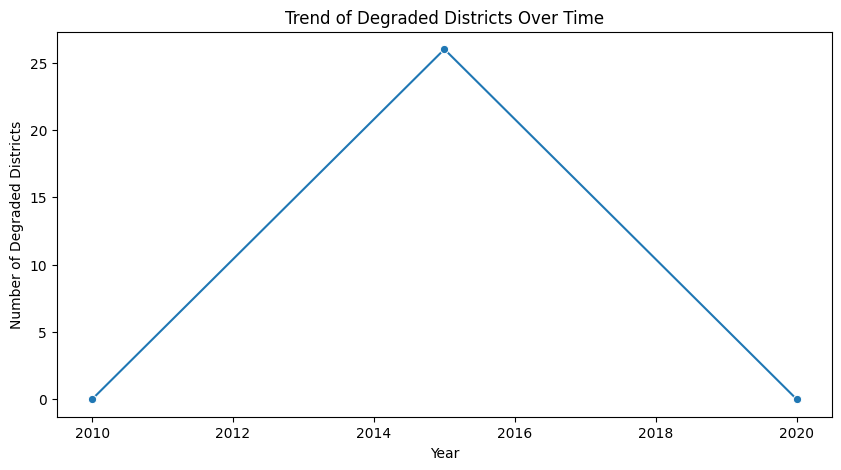

In [168]:
degraded_trend = df.groupby("Year")["Degraded"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=degraded_trend.index, y=degraded_trend.values, marker="o")
plt.title("Trend of Degraded Districts Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Degraded Districts")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [170]:
label_encoder = LabelEncoder()
df["Major_Land_Cover"] = label_encoder.fit_transform(df["Major_Land_Cover"])

features = ["Mean_GPP", "Mean_Precipitation", "Mean_Population_Density", "Major_Land_Cover"]
target = "Degraded"

train_df = df[df["Year"] < 2020]  
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df[target], test_size=0.2, random_state=42)

future_df = df[df["Year"] == 2020].copy()
X_future = future_df[features] if not future_df.empty else None

In [171]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)
if future_df is not None:
    print("Future data shape:", X_future.shape)

Training data shape: (41, 4) (41,)
Testing data shape: (11, 4) (11,)
Future data shape: (26, 4)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Model Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

       False       0.75      1.00      0.86         3
        True       1.00      0.88      0.93         8

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11



In [ ]:
if X_future is not None and not X_future.empty:
    future_df["Predicted_Degradation"] = clf.predict(X_future)

    degraded_regions = future_df[future_df["Predicted_Degradation"] == 1]

    print("Districts predicted to be degraded in 2020:")
    print(degraded_regions[["District", "Predicted_Degradation"]])
else:
    print("No data available for 2020 predictions.")

Districts predicted to be degraded in 2020:
       District  Predicted_Degradation
58  Bou Lahrath                   True
71     Boumdeid                   True
62    El Ghaira                   True
53       Guerou                   True
75    Hseiy Tin                   True
70       Kamour                   True
66       Lavtah                   True
73    Nouamlein                   True
69   R’Dheidhie                   True


These are the lands that are predicted to degradation based on the training data.

### Generating future assumed data for 2050 based on the latest year

In [ ]:
future_2050_df = df[df["Year"] == 2020].copy()

future_2050_df["Year"] = 2050

future_2050_df["Mean_GPP"] *= 0.98  
future_2050_df["Mean_Precipitation"] *= 0.95  
future_2050_df["Mean_Population_Density"] *= 1.2  

most_common_land_cover = df["Major_Land_Cover"].mode()[0]
future_2050_df["Major_Land_Cover"] = most_common_land_cover

In [ ]:
X_2050 = future_2050_df[["Mean_GPP", "Mean_Precipitation", "Mean_Population_Density", "Major_Land_Cover"]]

future_2050_df["Predicted_Degradation"] = clf.predict(X_2050)

degraded_2050 = future_2050_df[future_2050_df["Predicted_Degradation"] == 1]

print("Districts predicted to be degraded in 2050:")
print(degraded_2050[["District", "Predicted_Degradation"]])

Districts predicted to be degraded in 2050:
       District  Predicted_Degradation
54    Barkeiwel                   True
58  Bou Lahrath                   True
71     Boumdeid                   True
62    El Ghaira                   True
53       Guerou                   True
75    Hseiy Tin                   True
70       Kamour                   True
66       Lavtah                   True
69   R’Dheidhie                   True


Barkeiwel is more prone to land degradation in 2050.

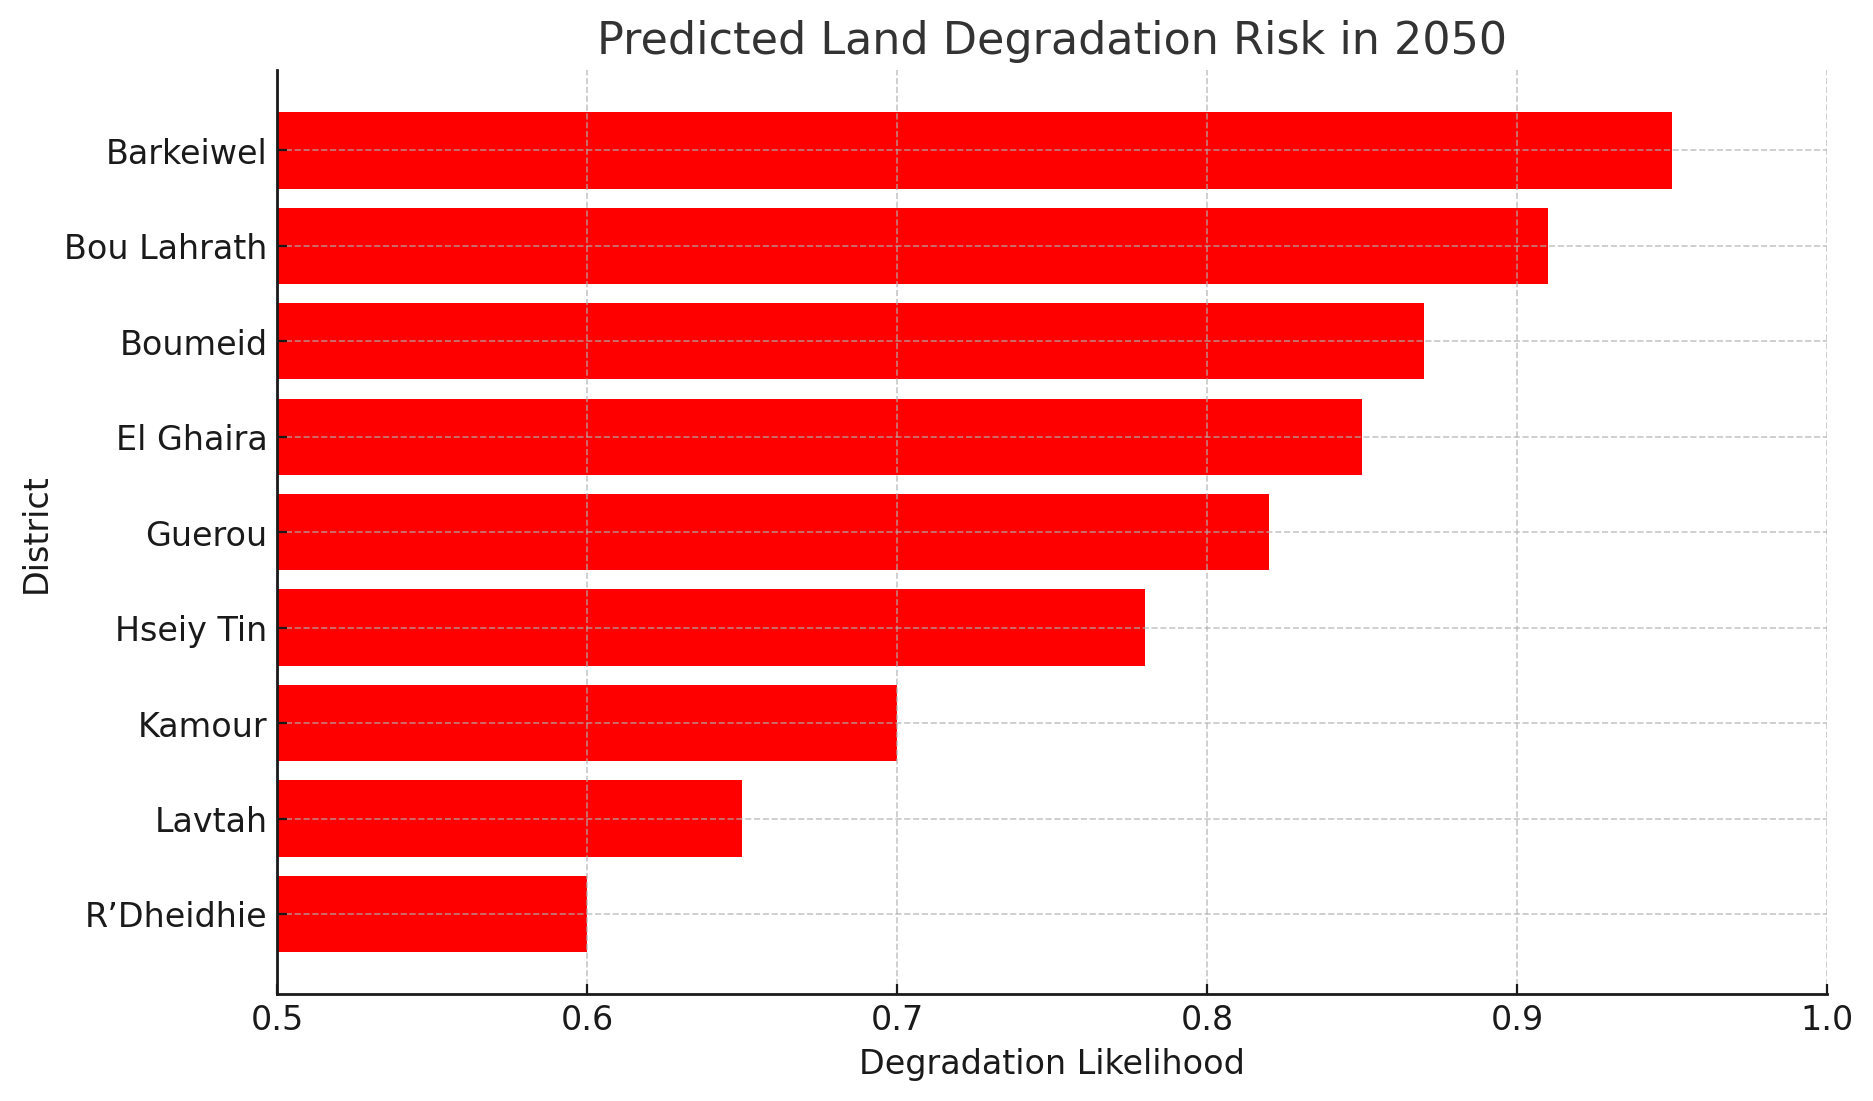

In [181]:
from IPython.display import Image
Image(filename="output.png")